In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import palettable as pltt
import seaborn as sns
from seaborn import palplot
import pandas as pd

# Data Collection and Cleaning

## Section 1 : Socio Economic Indicators 

Data Source: http://www.devdatalab.org/covid

Path: https://www.dropbox.com/sh/y949ncp39towulf/AAADOq6icGOYL56UZ0a1kc4Ba/nfhs?dl=0&subfolder_nav_tracking=1

Variables of Interest

|   Variable Name                   |             Definition                                      |
|-----------------------------------|-------------------------------------------------------------|
|pc11_district_id                   |Unique District ID Census 2011                               |
|pc11_district_name                 |District name in census 2011                                 |
|pc11_state_id                      |State ID in census 2011                                      |
|pc11_state_name                    |State name in census 2011                                    |
|richest                            |Richest 20% in 2016                                          |
|poorest                            |Poorest 20% in 2016                                          |
|water_dwelling                     |% housedholds with water access within dwelling in 2016      |
|water_fetch_women                  |% households where women fetch water from outside in 2016    | 
|hand_wash_water                    |% households with hand washing arrangement in 2016           |
|hand_wash_soap                     |% households handwashing with soap in 2016                   |
|no_toilet                          |% households who practiced open defecation in 2016           |
|firewood                           |% households who used firewood for fuel in 2016              |
|num_rooms                          |Average number of rooms in 2016                              |
|mem_per_room                       |Average number of members per room                           |
|dum_65p                            |% households with a 65+ member                               |

In [2]:
#Loading up the data
nfhs_dta_path = 'data/Indicators/ddl_nfhs_2011.dta'
nfhs_df= pd.read_stata(nfhs_dta_path)

# Dropping columns with variables connected only with the women and district and state names
nfhs_df=nfhs_df.drop(['ex_diab_broad_ind_fem', 'ex_htn_broad_ind_fem', 'bmigrt27_5_fem', 'csmoke_fem'], axis=1)

nfhs_df.head()                     

,pc11_district_id,pc11_district_name,pc11_state_id,pc11_state_name,richest,poorest,water_dwelling,water_fetch_women,hand_wash_water,hand_wash_soap,no_toilet,firewood,num_rooms,mem_per_room,dum_65p
0,001,Kupwara,1,Jammu & Kashmir,8.311805,8.311969,7.057642,94.276848,96.740593,79.543213,0.826517,50.830387,2.346276,2.950212,34.456902
1,002,Badgam,1,Jammu & Kashmir,13.833916,1.934850,5.946562,93.986191,97.964149,89.273155,0.509206,36.995975,2.627664,2.467012,34.934296
2,003,LehLadakh,1,Jammu & Kashmir,6.757979,3.378412,6.472993,82.190422,76.990524,61.748947,1.690710,9.061338,2.088325,2.106857,29.558363
3,004,Kargil,1,Jammu & Kashmir,3.752654,18.584255,2.996613,87.871864,50.327682,41.393616,0.834409,36.651791,2.346389,2.533801,26.990757
4,005,Punch,1,Jammu & Kashmir,16.886778,11.014970,2.295900,94.575592,77.891991,58.317440,38.312347,77.006042,2.319419,2.831645,22.103603


### Subsetting

In [3]:
#Taking only a limited set of indicators for ease of merging, this can always be changed later.
req_indicators_socio = ['pc11_district_id','pc11_district_name','pc11_state_id','pc11_state_name','richest','poorest','hand_wash_water','hand_wash_soap','no_toilet','num_rooms','mem_per_room']

nfhs_df_subset = nfhs_df[req_indicators_socio]

In [4]:
nfhs_df_subset

,pc11_district_id,pc11_district_name,pc11_state_id,pc11_state_name,richest,poorest,hand_wash_water,hand_wash_soap,no_toilet,num_rooms,mem_per_room
0,001,Kupwara,1,Jammu & Kashmir,8.311805,8.311969,96.740593,79.543213,0.826517,2.346276,2.950212
1,002,Badgam,1,Jammu & Kashmir,13.833916,1.934850,97.964149,89.273155,0.509206,2.627664,2.467012
2,003,LehLadakh,1,Jammu & Kashmir,6.757979,3.378412,76.990524,61.748947,1.690710,2.088325,2.106857
3,004,Kargil,1,Jammu & Kashmir,3.752654,18.584255,50.327682,41.393616,0.834409,2.346389,2.533801
4,005,Punch,1,Jammu & Kashmir,16.886778,11.014970,77.891991,58.317440,38.312347,2.319419,2.831645
...,...,...,...,...,...,...,...,...,...,...,...
635,636,Mahe,34,Puducherry,60.228069,0.127000,92.435822,86.086815,0.767188,3.057440,1.692834
636,637,Karaikal,34,Puducherry,32.230705,6.298126,86.678001,50.815098,29.341400,1.931146,2.559011
637,638,Nicobars,35,Andaman & Nicobar Island,6.601454,0.742095,84.566566,66.542244,5.327342,2.163102,2.802585
638,639,North & Middle Andaman,35,Andaman & Nicobar Island,11.717015,13.601043,96.911453,80.124420,38.738136,1.996660,2.166920


## Section 2 : Health Infrastructure


|   Variable Name                   |             Definition                                                         |
|-----------------------------------|--------------------------------------------------------------------------------|
|pc11_district_id                   |2011 Census District ID                                                         |
|pc11_district_name                 |2011 Census District name                                                       |
|pc11_state_id                      |2011 Census State ID                                                            |
|pc11_state_name                    |2011 Census State Name                                                          |
|count_2011_sub                     |Number of sub-centres in the district in 2016                                   |
|count_2011_dish                    |Number of district hospitals in the district in 2016                            |
|count_2011_sth                     |Number of sub-district/taluk hospitals in the district in 2016                  |
|count_2011_phc                     |Number of primary health centers in the district in 2016                        |
|count_2011_chc                     |Number of community health centers in the district in 2016                      | 
|pr_2011_phc                        |Number of primary health centers per 10000 people in the district in 2016       |
|pr_2011_chc                        |Number of community health centers per 10000 people in the district in 2016     |
|pr_2011_sub                        |Number of sub-centres per 10000 people in the district in 2016                  |
|pr_2011_dish                       |Number of district hospitals per 10000 people in the district in 2016           |
|pr_2011_sth                        |Number of sub-district/taluk hospitals per 10000 people in the district in 2016 |


In [5]:
# Data file paths
health_infra_dta_path = 'data/Hospital/ddl_health_infra_2011.dta'

# Read dta file
health_infra_df = pd.read_stata(health_infra_dta_path)

# Droping the count columns and district and state names columns
health_infra_df = health_infra_df.drop([ 'pc11_district_name','count_2011_sub','pr_2011_sub','count_2011_dish', 
                                      'count_2011_sth', 'count_2011_phc', 'count_2011_chc'], axis=1)

# renaming columns
health_infra_df = health_infra_df.rename(columns={'pr_2011_phc' : 'primary_health_centers',
                                                'pr_2011_chc' : 'community_health_centers',
                                                'pr_2011_dish': 'district_hospitals',
                                                'pr_2011_sth' : 'sub_taluk_hospitals'
                                               })
health_infra_df.head()

,pc11_district_id,pc11_state_id,pc11_state_name,primary_health_centers,community_health_centers,district_hospitals,sub_taluk_hospitals
0,001,1,Jammu & Kashmir,0.344717,0.064634,0.010772,0.0
1,002,1,Jammu & Kashmir,0.696582,0.099512,0.012439,0.0
2,003,1,Jammu & Kashmir,1.053564,0.210713,0.070238,0.0
3,004,1,Jammu & Kashmir,1.065417,0.266354,0.066589,0.0
4,005,1,Jammu & Kashmir,0.668528,0.078650,0.019663,0.0


### Subsetting 

In [6]:
#Taking only a limited set of indicators for ease of merging, this can always be changed later.
req_indicators_health = ['pc11_district_id','primary_health_centers']

health_infra_df_subset = health_infra_df[req_indicators_health]

health_infra_df_subset

,pc11_district_id,primary_health_centers
0,001,0.344717
1,002,0.696582
2,003,1.053564
3,004,1.065417
4,005,0.668528
...,...,...
635,636,0.448432
636,637,0.468271
637,638,1.272434
638,639,0.621520


## Section 3 : Pollution


|   Variable Name                   |             Definition                                      |
|-----------------------------------|-------------------------------------------------------------|
|pc11_district_id                   |Unique District ID Census 2011                               |
|pc11_district_name                 |District name in census 2011                                 |
|pc11_state_id                      |State ID in census 2011                                      |
|pc11_state_name                    |State name in census 2011                                    |
|mean_pollution                     |PM2.5 mean in 2016                                           |

In [7]:
# Data file paths
pollution_dta_path = 'data/Indicators/ddl_pollution_sedac_2011.dta'

# Read dta file in
pollution_df= pd.read_stata(pollution_dta_path)

# Dropping columns 
pollution_df=pollution_df.drop(['pc11_district_name','pc11_state_id','pc11_state_name'], axis=1)
                               
pollution_df

,pc11_district_id,mean_pollution
0,001,29.339097
1,002,38.904636
2,003,3.993170
3,004,8.861835
4,005,35.535978
...,...,...
635,636,22.700000
636,637,24.778195
637,638,4.545310
638,639,11.607143


## Section 4 : Covid Case Counts

In [8]:
deaths_pc11  = pd.read_stata('data/covid_infected_deaths_pc11.dta')
deaths_30_07 = deaths_pc11[deaths_pc11.date == '2020-07-30']
deaths_30_07 = deaths_30_07.drop(columns=['date'])
deaths_30_07.to_csv('data/covid_infected_deaths_30.07.2020.csv')
deaths_30_07.set_index("pc11_state_id", inplace = True)
state_cases_df = deaths_30_07.sum(level='pc11_state_id')

In [9]:
state_cases_df = state_cases_df.reset_index()

In [10]:
state_cases_df = state_cases_df.dropna()

In [11]:
state_cases_df = state_cases_df.drop(index=0)

In [12]:
state_cases_df

,pc11_state_id,total_cases,total_deaths
1,01,21247.00000,371.000000
2,02,2506.00000,13.000000
3,03,15456.00000,370.000000
4,04,1016.00000,14.000000
5,05,7065.00000,76.000000
6,06,34219.00000,417.000000
7,07,134403.00000,3936.000000
8,08,40629.00000,630.000000
9,09,81039.00000,1587.000000
10,10,48001.00000,285.000000


## Section 5: Migration

Background: https://www.ideasforindia.in/topics/macroeconomics/covid-19-expected-migrant-movement-as-lockdown-eases.html

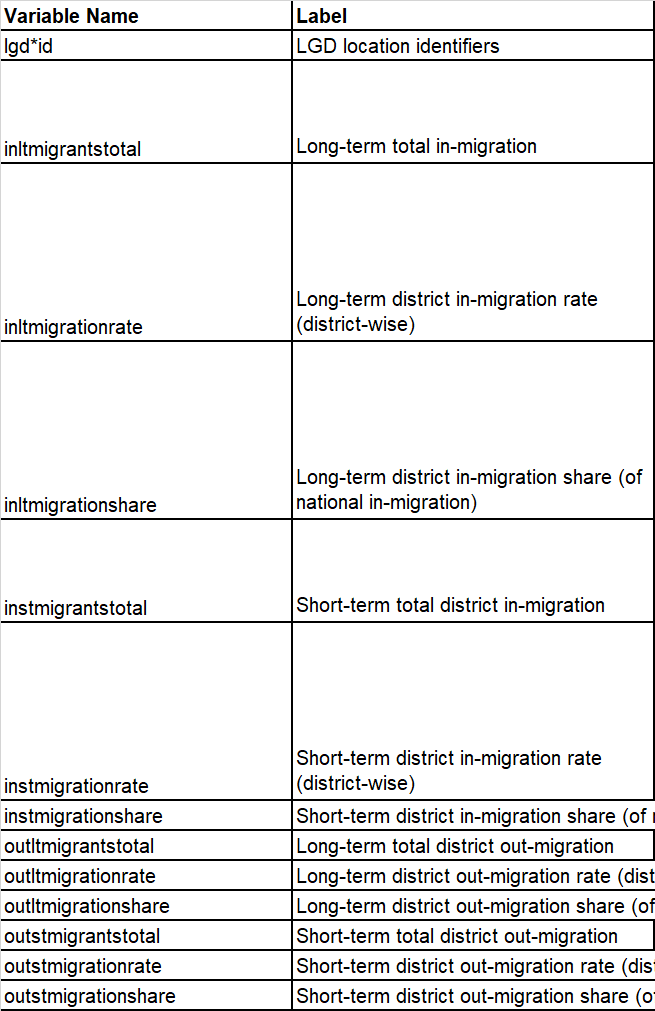

In [13]:
migration_df = pd.read_stata('data/district_migration_pc11.dta')
migration_df

,pc11_state_id,pc11_district_id,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare
0,01,001,8185802.0,0.000751,0.000080,10900000.0,0.001468,0.000118,8185802,0.002328,0.000247,10900000,0.001601,1.283000e-04
1,01,002,8185802.0,0.001551,0.000143,10900000.0,0.001404,0.000097,8185802,0.002037,0.000188,10900000,0.001185,8.220000e-05
2,01,003,8185802.0,0.000427,0.000007,10900000.0,0.006163,0.000076,8185802,0.006820,0.000111,10900000,0.000000,0.000000e+00
3,01,004,8185802.0,0.000433,0.000007,10900000.0,0.005456,0.000071,8185802,0.001697,0.000029,10900000,0.000000,0.000000e+00
4,01,005,8185802.0,0.001091,0.000064,10900000.0,0.000412,0.000018,8185802,0.004508,0.000263,10900000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,8185802.0,0.038693,0.000198,10900000.0,0.005110,0.000020,8185802,0.021653,0.000111,10900000,0.000253,9.720000e-07
636,34,637,8185802.0,0.011552,0.000283,10900000.0,0.030466,0.000562,8185802,0.011098,0.000271,10900000,0.006689,1.233000e-04
637,35,638,8185802.0,0.042723,0.000192,10900000.0,0.024437,0.000083,8185802,0.064208,0.000289,10900000,0.000000,0.000000e+00
638,35,639,8185802.0,0.033330,0.000430,10900000.0,0.103715,0.001008,8185802,0.011106,0.000143,10900000,0.001146,1.110000e-05


In [14]:
req_indicators_mig = ['pc11_district_id','inltmigrationrate','instmigrationrate','outltmigrationrate','outstmigrationrate']

In [15]:
migration_df_subset = migration_df[req_indicators_mig]

In [16]:
migration_df_subset  = migration_df_subset.rename(columns={'inltmigrationrate' : 'in_migration_rate_longterm',
                                                'instmigrationrate' : 'in_migration_rate_shortterm',
                                                'outltmigrationrate': 'out_migration_rate_longterm',
                                                'outstmigrationrate' : 'out_migration_rate_shortterm'
                                               })

In [17]:
migration_df_subset

,pc11_district_id,in_migration_rate_longterm,in_migration_rate_shortterm,out_migration_rate_longterm,out_migration_rate_shortterm
0,001,0.000751,0.001468,0.002328,0.001601
1,002,0.001551,0.001404,0.002037,0.001185
2,003,0.000427,0.006163,0.006820,0.000000
3,004,0.000433,0.005456,0.001697,0.000000
4,005,0.001091,0.000412,0.004508,0.000000
...,...,...,...,...,...
635,636,0.038693,0.005110,0.021653,0.000253
636,637,0.011552,0.030466,0.011098,0.006689
637,638,0.042723,0.024437,0.064208,0.000000
638,639,0.033330,0.103715,0.011106,0.001146


## Section 6: Hospital Beds and Population 

|   Variable Name                   |             Definition                                      |
|-----------------------------------|-------------------------------------------------------------|
|pc11_district_id                   |Unique District ID Census 2011                               |
|pc11_state_id                      |State ID in census 2011                                      |
|dlhs4_dh_beds                      |District hospital beds                                       |
|dlhs4_dh_count                     |Number of district hospitals                                 |
|dlhs4_dh_staff                     |District hospitals staff                                     |
|dlhs4_dh_icu_beds                  |District hospitals Intensive care beds                       | 
|dlhs4_chc_beds                     |Community health centers beds                                |
|dlhs4_chc_count                    |Number of Community health centers                           |
|dlhs4_chc_staff                    |Community health centers staff                               |
|dlhs4_chc_beds_ven                 |Community health centers beds with ventilator                |
|dlhs4_phc_count                    |Number of Public health centers                              |
|dlhs4_phc_staff                    |Public health centers staff                                  |
|dlhs4_phc_pop                      |??????                               |
|dlhs4_phc_beds_oxy                 |Public health centers oxygen beds                            |
|pc11_pca_tot_p                     |Populations as of 2011                                       |
|dlhs4_phc_mult                     |??????                                      |
|dlhs4_total_beds                   |Total beds                                                   |
|dlhs4_total_staff                  |Total staff                                                  |
|dlhs4_total_facilities             |Totall facilities                                            |

In [18]:
# Data file paths
hospitals_dta_path = 'data/Hospital/dlhs4_hospitals_dist_pc11.dta'

# Read dta file in
hospitals_df= pd.read_stata(hospitals_dta_path)
# Display top of table
hospitals_df.head()

,pc11_state_id,pc11_district_id,dlhs4_dh_beds,dlhs4_dh_count,dlhs4_dh_staff,dlhs4_dh_icu_beds,dlhs4_chc_beds,dlhs4_chc_count,dlhs4_chc_staff,dlhs4_chc_beds_ven,dlhs4_phc_beds,dlhs4_phc_count,dlhs4_phc_staff,dlhs4_phc_pop,dlhs4_phc_beds_oxy,pc11_pca_tot_p,dlhs4_phc_mult,dlhs4_total_beds,dlhs4_total_staff,dlhs4_total_facilities
0,02,023,200,1,42,0.0,165,8,86,0.0,68,16,41,157586.0,38.0,519080,3.293947,588.988403,263.051849,61.703159
1,02,024,300,1,53,0.0,262,11,183,30.0,71,19,100,867424.0,60.0,1510075,1.740873,685.601990,410.087311,45.076588
2,02,025,70,1,17,1.0,21,2,26,0.0,33,8,27,24337.0,13.0,31564,1.296955,133.799530,78.017792,13.375642
3,02,026,200,1,68,2.0,105,6,101,0.0,24,5,31,91380.0,12.0,437903,4.792110,420.010651,317.555420,30.960550
4,02,027,300,1,92,3.0,303,10,178,0.0,50,14,65,207184.0,30.0,999777,4.825551,844.277527,583.660828,78.557716


In [19]:
indicators_hosp_bed = ['pc11_district_id','dlhs4_dh_beds','dlhs4_dh_count','dlhs4_dh_staff','pc11_pca_tot_p']

hospitals_df_subset = hospitals_df[indicators_hosp_bed]

In [20]:
hospitals_df_subset

,pc11_district_id,dlhs4_dh_beds,dlhs4_dh_count,dlhs4_dh_staff,pc11_pca_tot_p
0,023,200,1,42,519080
1,024,300,1,53,1510075
2,025,70,1,17,31564
3,026,200,1,68,437903
4,027,300,1,92,999777
...,...,...,...,...,...
547,636,171,1,1429,41816
548,637,0,0,0,200222
549,638,53,1,41,36842
550,639,70,1,81,105597


In [21]:
hospitals_df_subset  = hospitals_df_subset.rename(columns={'dlhs4_dh_beds' : 'district_hospital_beds',
                                                'dlhs4_dh_count' : 'district_hospitals',
                                                'dlhs4_dh_staff': 'district_hospital_staff',
                                                'pc11_pca_tot_p' : 'total_population'
                                               })

In [22]:
hospitals_df_subset

,pc11_district_id,district_hospital_beds,district_hospitals,district_hospital_staff,total_population
0,023,200,1,42,519080
1,024,300,1,53,1510075
2,025,70,1,17,31564
3,026,200,1,68,437903
4,027,300,1,92,999777
...,...,...,...,...,...
547,636,171,1,1429,41816
548,637,0,0,0,200222
549,638,53,1,41,36842
550,639,70,1,81,105597


## Section 8: Geo Shape Files

In [42]:
geo_map = gpd.read_file('data/ShapeFiles/2011_Dist.shp')

geo_map.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [43]:
#censuscode is the one corresponding to the pc11_district_id :)

#retrieving just the required columns and renaming it
columns = ['censuscode','geometry']
geo_map = geo_map[columns]
geo_map = geo_map.rename(columns={'censuscode' : 'pc11_district_id'})

## Section 7 : Merge Datasets

In [49]:
#merging seperately because couldn't get the merging in one statement right for some reason


In [26]:
# df_list = [nfhs_df_subset,state_cases_df,health_infra_df_subset,hospitals_df_subset,pollution_df,migration_df_subset]
nfhs_df_subset.pc11_state_id = nfhs_df_subset.pc11_state_id.astype(int)
state_cases_df.pc11_state_id = state_cases_df.pc11_state_id.astype(int)

df_merge_1 =  nfhs_df_subset.merge(state_cases_df, on='pc11_state_id')
df_merge_1.head()

C:\Users\lekha\Anaconda3\envs\gds\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,pc11_district_id,pc11_district_name,pc11_state_id,pc11_state_name,richest,poorest,hand_wash_water,hand_wash_soap,no_toilet,num_rooms,mem_per_room,total_cases,total_deaths
0,001,Kupwara,1,Jammu & Kashmir,8.311805,8.311969,96.740593,79.543213,0.826517,2.346276,2.950212,21247.0,371.0
1,002,Badgam,1,Jammu & Kashmir,13.833916,1.934850,97.964149,89.273155,0.509206,2.627664,2.467012,21247.0,371.0
2,003,LehLadakh,1,Jammu & Kashmir,6.757979,3.378412,76.990524,61.748947,1.690710,2.088325,2.106857,21247.0,371.0
3,004,Kargil,1,Jammu & Kashmir,3.752654,18.584255,50.327682,41.393616,0.834409,2.346389,2.533801,21247.0,371.0
4,005,Punch,1,Jammu & Kashmir,16.886778,11.014970,77.891991,58.317440,38.312347,2.319419,2.831645,21247.0,371.0


In [27]:
#setting pc11_district_id as int explicitly otherwise gives error of unable to merge 'obj' and 'int'
df_merge_1.pc11_district_id = df_merge_1.pc11_district_id.astype(int)
health_infra_df_subset.pc11_district_id = health_infra_df_subset.pc11_district_id.astype(int)
hospitals_df_subset.pc11_district_id = hospitals_df_subset.pc11_district_id.astype(int)
pollution_df.pc11_district_id = pollution_df.pc11_district_id.astype(int)
migration_df_subset.pc11_district_id = migration_df_subset.pc11_district_id.astype(int)
geo_map.pc11_district_id = geo_map.pc11_district_id.astype(int)

df_merge_2 = df_merge_1.merge(health_infra_df_subset, on='pc11_district_id')

C:\Users\lekha\Anaconda3\envs\gds\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
df_merge_3 = df_merge_2.merge(hospitals_df_subset, on='pc11_district_id')

In [29]:
df_merge_4 = df_merge_3.merge(pollution_df, on='pc11_district_id')

In [50]:
df_merge_5 = df_merge_4.merge(migration_df_subset, on='pc11_district_id')

In [51]:
df_final = geo_map.merge(df_merge_5, on='pc11_district_id')

In [53]:
#Final dataset - Whoo hoo!
df_final.head()

,pc11_district_id,geometry,pc11_district_name,pc11_state_id,pc11_state_name,richest,poorest,hand_wash_water,hand_wash_soap,no_toilet,...,primary_health_centers,district_hospital_beds,district_hospitals,district_hospital_staff,total_population,mean_pollution,in_migration_rate_longterm,in_migration_rate_shortterm,out_migration_rate_longterm,out_migration_rate_shortterm
0,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",Adilabad,28,Andhra Pradesh,10.146048,19.234352,80.300583,44.867771,60.972797,...,0.468578,620,4,299,2741239,38.587566,0.002079,0.007267,0.002874,0.000113
1,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",Agra,9,Uttar Pradesh,26.242498,12.138341,95.646973,80.356461,43.153305,...,0.163379,308,2,188,4418797,99.337360,0.003359,0.001431,0.007020,0.002246
2,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",Ahmadnagar,27,Maharashtra,19.514618,11.406840,78.017708,65.902931,36.771778,...,0.290984,374,3,228,4543159,40.658252,0.016085,0.003044,0.013191,0.000356
3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",Aizawl,15,Mizoram,52.209724,0.302493,98.716148,97.864502,0.000000,...,0.351321,350,2,310,400309,22.291126,0.008469,0.012265,0.005671,0.000608
4,119,"MULTIPOLYGON (((74.89253 26.97702, 74.90465 26...",Ajmer,8,Rajasthan,31.092033,4.433304,93.763237,81.500694,24.860510,...,0.326677,757,5,406,2583052,38.178213,0.006164,0.004496,0.007555,0.003985


In [54]:
df_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 552 entries, 0 to 551
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   pc11_district_id              552 non-null    int32   
 1   geometry                      552 non-null    geometry
 2   pc11_district_name            552 non-null    object  
 3   pc11_state_id                 552 non-null    int32   
 4   pc11_state_name               552 non-null    object  
 5   richest                       552 non-null    float32 
 6   poorest                       552 non-null    float32 
 7   hand_wash_water               552 non-null    float32 
 8   hand_wash_soap                552 non-null    float32 
 9   no_toilet                     552 non-null    float32 
 10  num_rooms                     552 non-null    float32 
 11  mem_per_room                  552 non-null    float32 
 12  total_cases                   552 non-null

In [32]:
# sns.pairplot(df_static_all)


<AxesSubplot:>

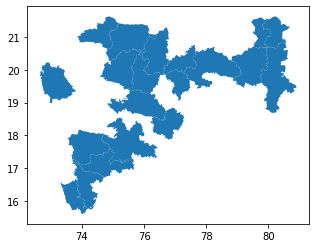

In [55]:
df_final.plot()
df_final.sort_values('total_cases',ascending=False,).head(20).plot()

In [38]:
correlation = ['total_cases','richest','poorest','district_hospitals']

